In [1]:
import sys
import pathlib
pth=str(pathlib.Path().absolute())
sys.path.append(('\\').join(pth.split('\\')[:-1])+"\\Utils")
from Utilities import *
import numpy as np
from skimage import io
from skimage import color
import matplotlib.pyplot as plt
from skimage.segmentation import slic
from skimage import morphology
from skimage.transform import rotate
import json

In [137]:
name='c1anemia-390'
di=('\\').join(pth.split('\\')[:-3])+'\\Data_base\\Imagenes_originales\\'+name+'.jpg'
ROI=('\\').join(pth.split('\\')[:-3])+'\\Data_base\\Sem_Auto\\eye_'+name+'.jpg'
img = io.imread(di)
ROI = io.imread(ROI)

f1=open(('\\').join(pth.split('\\')[:-3])+"\\Data_base\\validcrop.txt","r")
lines=f1.readlines()
linesn=np.array(lines)
linesn=np.delete(lines,np.where(linesn=="\n"))
linesn=linesn.reshape(-1,3)
linesnc=v_replace_err(linesn)
linesnc=np.vectorize(pyfunc=lambda x:np.array([x[0].split('\n')[0]]),signature="(n)->(m)")(linesnc.reshape(-1,1)).reshape(-1,3)
xywh=linesnc[:,:2]
imgnames=linesnc[:,2]
xywh=v_no_spaces(xywh)
xywh=np.vectorize(pyfunc=(lambda x:float(x)))(xywh.reshape(1,-1)[0])
xywh=xywh.reshape(-1,4).astype(int)+1

mr=xywh[np.where(imgnames==(name+".jpg"))][0]
mask=assemble_mask(mr,img,ROI)

In [138]:
SD,segments=get_Statistical_Descriptors_(img,mask,n_segments=20)

(-0.5, 3119.5, 4159.5, -0.5)

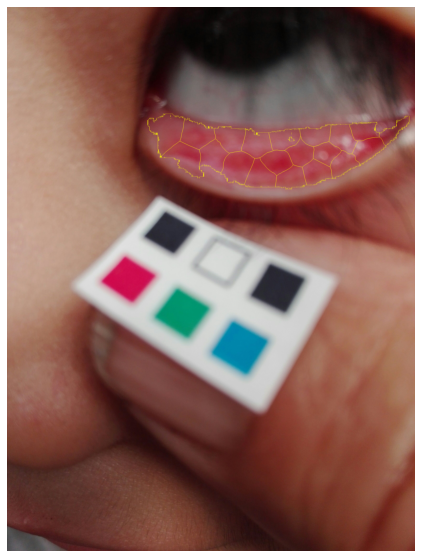

In [139]:
import matplotlib.pyplot as plt
fig = plt.figure("Superpixels -- %d segments" % (20),figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(img, segments))
plt.axis("off")

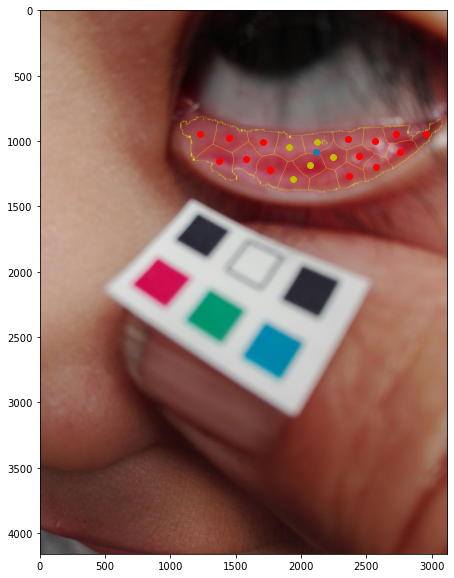

In [140]:
centers=np.vectorize(lambda SD,s:np.array([SD[s]['x_mean'],SD[s]['y_mean']]),signature="(),()->(i)")(SD,np.arange(1,20))
centerd=np.hstack((centers,np.linalg.norm(centers-np.mean(centers,axis=0),axis=1).reshape(-1,1)))
slc=centerd[centerd[:,2].argsort()][:5,:2]
centers
import matplotlib.pyplot as plt
fig = plt.figure("Superpixels -- %d segments" % (20),figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(mark_boundaries(img, segments))
plt.scatter(centers[:,1],centers[:,0],color="r")
plt.scatter(np.mean(centers[:,1]),np.mean(centers[:,0]))
plt.scatter(slc[:,1],slc[:,0],color="y")
#plt.axis("off")